## Title : Ex: Polynomial Regression 
- Goal:  Create cubic polynomial least-squares regression

## Description

After fitting the model and getting the predictions, you should see the following plot: 


<img src="../fig/fig1_cubic.png" style="width: 500px;">


## Hints: 

<a href="https://www.statsmodels.org/v0.10.1/generated/statsmodels.regression.linear_model.OLS.html#statsmodels.regression.linear_model.OLS" target="_blank">Formulas in statsmodels</a>

<a href="https://www.statsmodels.org/v0.10.1/generated/statsmodels.regression.linear_model.OLS.html#statsmodels.regression.linear_model.OLS" target="_blank">sm.ols</a>

<a href="https://docs.scipy.org/doc/numpy/reference/generated/numpy.vander.html" target="_blank">numpy vander</a>

Refer to lecture notebook.

Do not change any other code except the blanks.

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import statsmodels.formula.api as sm

%matplotlib inline 

In [6]:
df = pd.read_csv('../data/data1.csv')
df = df.sort_values('x')
df.head()

,x,y
73,0.006248,17.329551
142,0.104671,15.268703
34,0.246137,15.394678
17,0.420595,12.743181
5,0.455565,15.480800


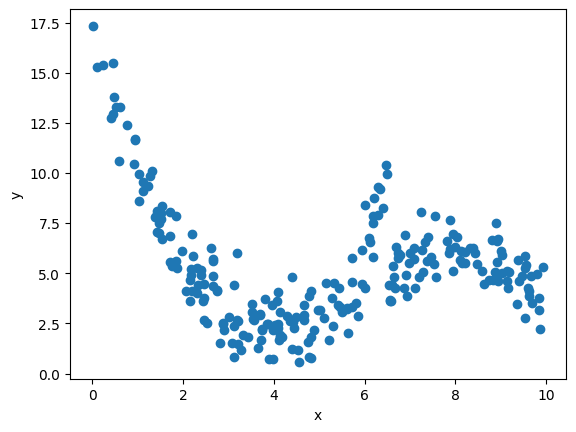

In [7]:
plt.scatter(df.x, df.y);
plt.xlabel("x")
plt.ylabel("y")
plt.show()

## Cubic polynomial least-squares regression of y on x

In [8]:
### edTest(test_ols_formula) ###
def fit_model(formula):
    return sm.ols(formula=formula, data=df).fit()

#formula = "y ~ x + np.power(x, 2) + np.power(x, 3)" 
formula = "y ~ np.vander(x,4, increasing=True)-1"
fit2_lm = fit_model(formula)

In [9]:
### edTest(test_predictions_summary) ###
#Get the predictions and the summary dataframe
poly_predictions = fit2_lm.get_prediction().summary_frame()   
poly_predictions

,mean,mean_se,mean_ci_lower,mean_ci_upper,obs_ci_lower,obs_ci_upper
73,17.855013,0.410201,17.047060,18.662966,15.178673,20.531353
142,16.931066,0.382049,16.178561,17.683571,14.270940,19.591193
34,15.665031,0.344343,14.986795,16.343268,13.024953,18.305110
17,14.201966,0.302322,13.606497,14.797436,11.581930,16.822003
5,13.921482,0.294496,13.341427,14.501536,11.304905,16.538058
...,...,...,...,...,...,...
138,3.589825,0.285333,3.027819,4.151831,0.977190,6.202460
125,3.435204,0.295099,2.853960,4.016447,0.818363,6.052044
86,3.408789,0.296770,2.824254,3.993323,0.791215,6.026362
192,3.384180,0.298327,2.796578,3.971782,0.765920,6.002440


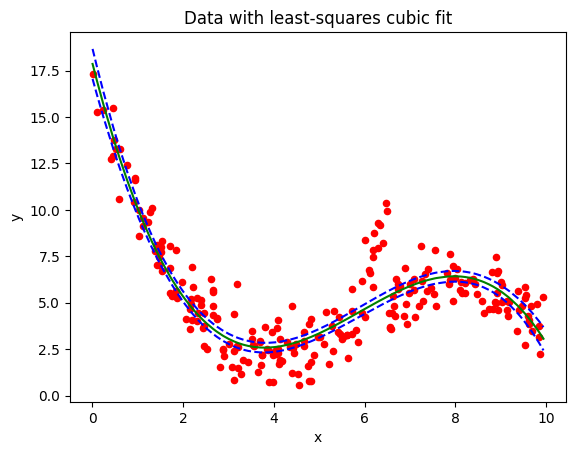

In [10]:
ax2 = df.plot.scatter(x='x',y='y',c='Red',title="Data with least-squares cubic fit")
ax2.set_xlabel("x")
ax2.set_ylabel("y")

# CI for the predection at each x value, i.e. the curve itself
ax2.plot(df.x, poly_predictions['mean'],color="green")
ax2.plot(df.x, poly_predictions['mean_ci_lower'], color="blue",linestyle="dashed")
ax2.plot(df.x, poly_predictions['mean_ci_upper'], color="blue",linestyle="dashed");


#### Condition number

In [ ]:
c = np.vander(df.x, 4, increasing=True)-1 #-1 as vander adds a column of 1s 
np.linalg.cond(c)

# found c=infinte 
# Vandermonde matrix is square geometric progression in each row or column matrix 
# used to find  the unique polynomial c (condition number) that passes through the distinct data podts

# The matrix created by the vander method of degree 3 is infinite (ill-conditioned)
# because of multicollinearity of the exponential growth of the polynomial terms.

np.float64(inf)